In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv('/content/cell_samples.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())


        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
                 ID       Clump    UnifSize   UnifShape     MargAdh  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000

In [3]:
df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,object
BlandChrom,int64
NormNucl,int64
Mit,int64


In [4]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

<ipython-input-4-97bc83133122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [5]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [6]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])

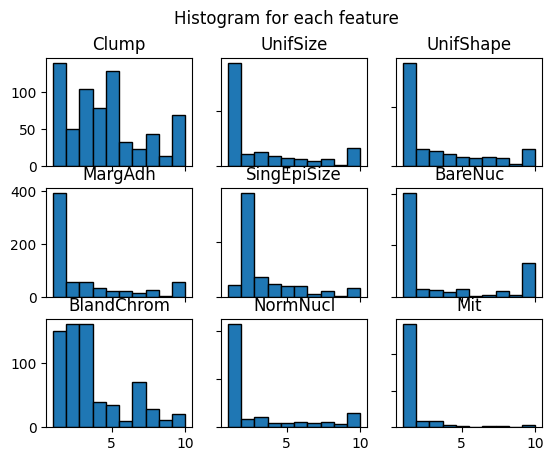

In [7]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Histogram for each feature')
c = 0
for i in range(3):
  for j in range(3):
    axs[i, j].hist(X[:,c],edgecolor='black')
    axs[i, j].set_title(df.columns[c+1])
    c+=1

for ax in axs.flat:
    ax.label_outer()

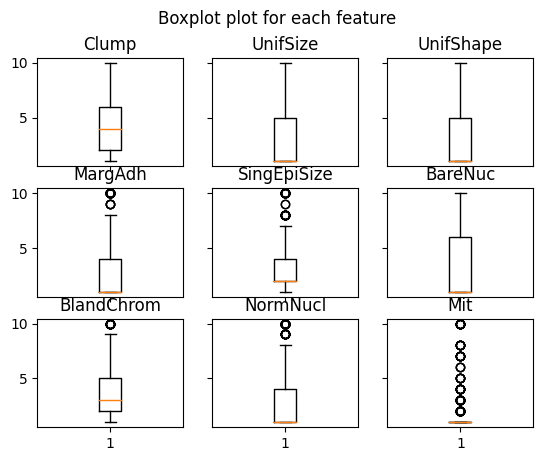

In [8]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Boxplot plot for each feature')
c = 0
for i in range(3):
  for j in range(3):
    axs[i, j].boxplot(X[:,c])
    axs[i, j].set_title(df.columns[c+1])
    c+=1

for ax in axs.flat:
    ax.label_outer()

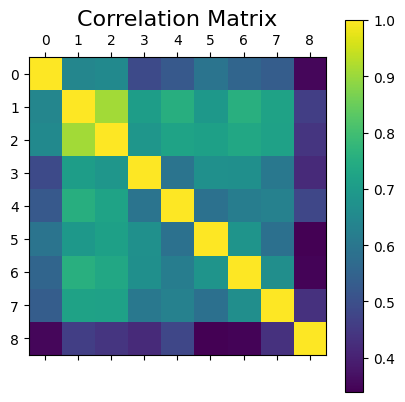

In [9]:
Corr = feature_df.corr()
plt.matshow(Corr)
plt.title('Correlation Matrix', fontsize=16)
plt.colorbar()
plt.show()

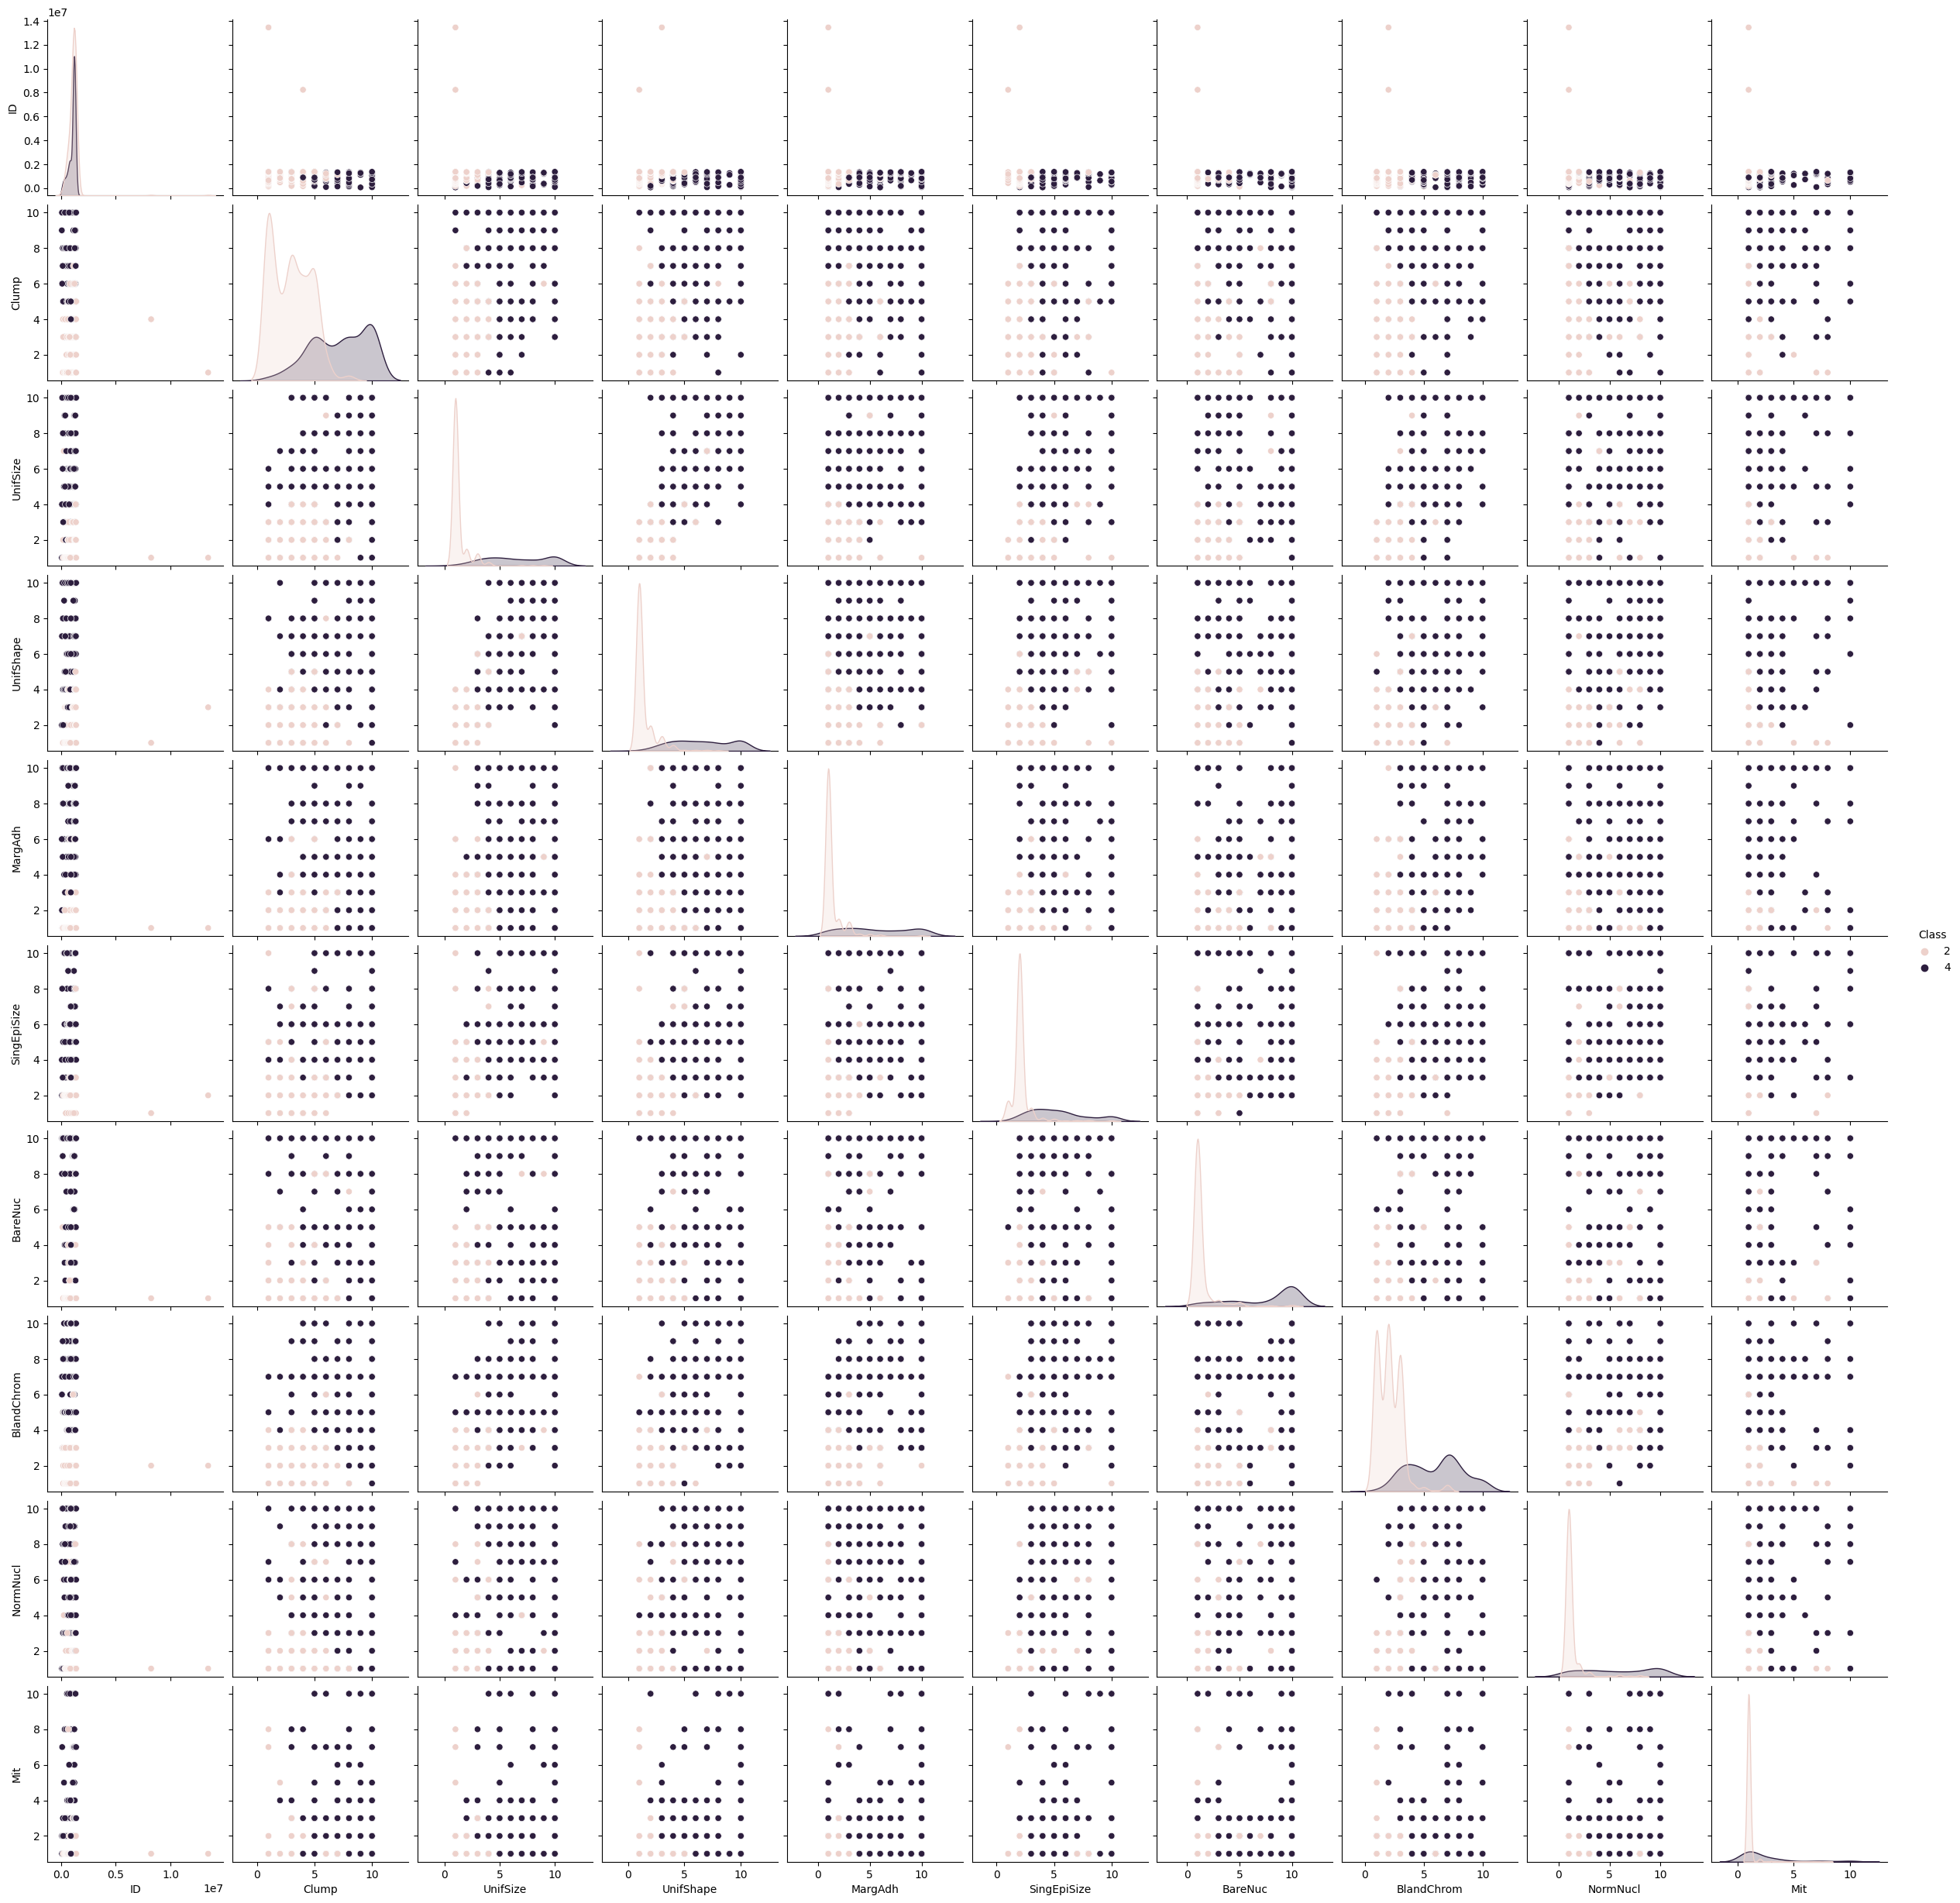

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

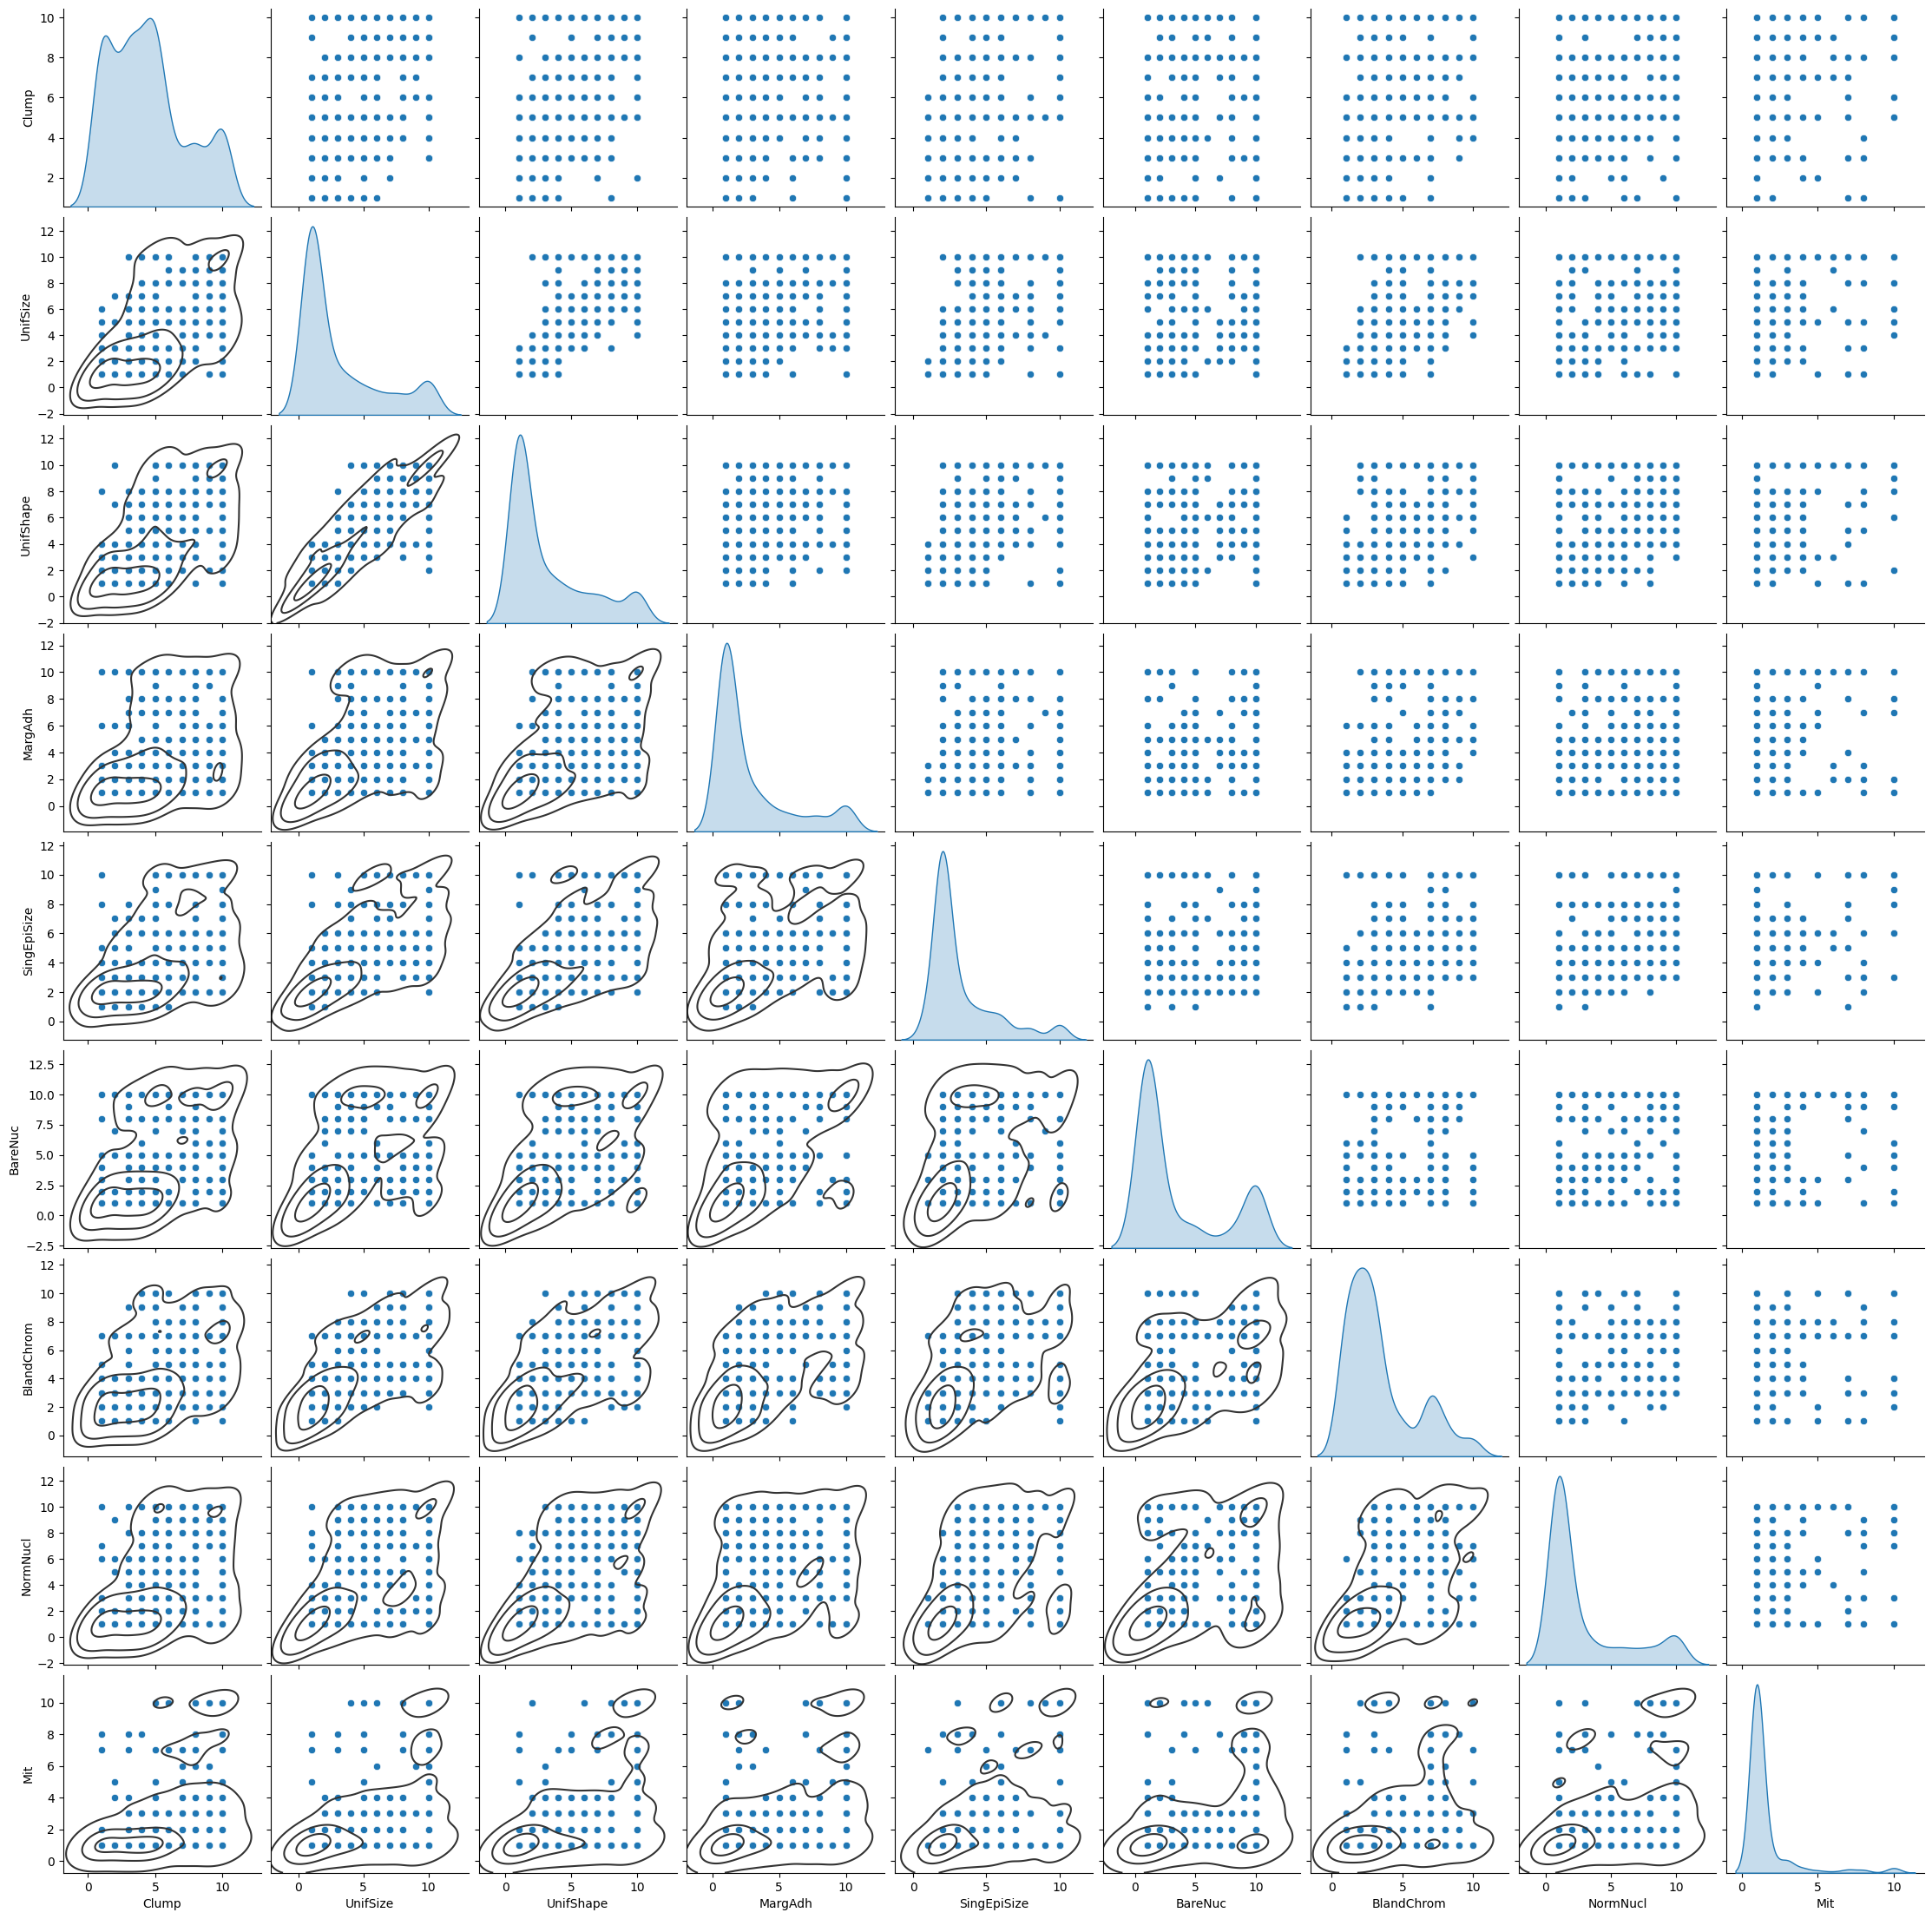

In [ ]:
g = sns.pairplot(feature_df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=32)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


In [11]:
model = SVC(kernel="sigmoid", C=100)
model.fit(X_train,y_train)
print("Accuracy in Training : ",model.score(X_train,y_train))
print("Accuracy in Testing : ",model.score(X_test,y_test))

Accuracy in Training :  0.3075313807531381
Accuracy in Testing :  0.3121951219512195


In [12]:
param_grid = {'C':[0.01,0.1,0,1,10,100],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [13]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}
0.9707317073170731


In [14]:
yhat = grid.predict(X_test)

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       133
           4       0.99      0.93      0.96        72

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205

Confusion matrix, without normalization
[[132   1]
 [  5  67]]


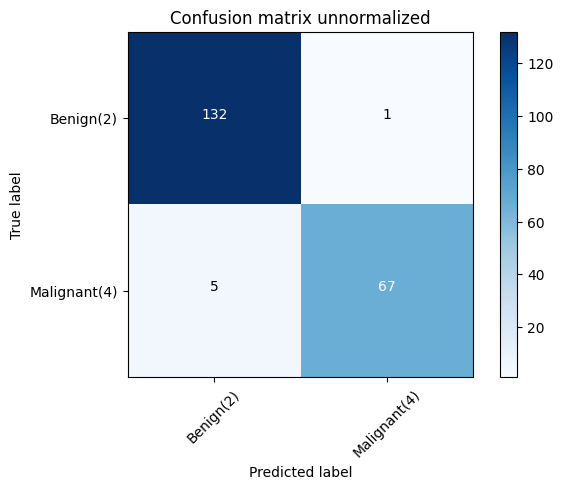

In [16]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix unnormalized')


Normalized confusion matrix
[[0.99 0.01]
 [0.07 0.93]]


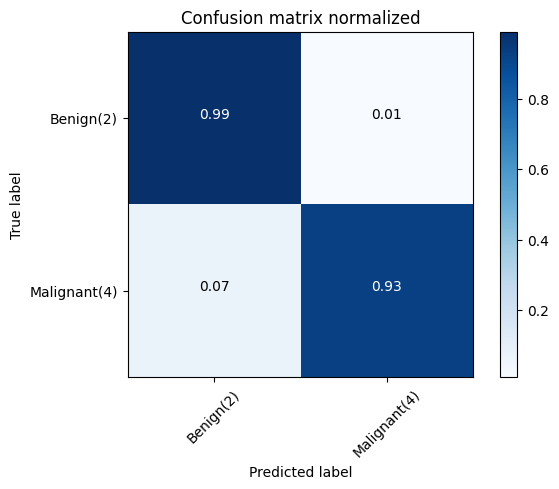

In [17]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= True,  title='Confusion matrix normalized')


In [18]:
jaccard_score(y_test, yhat,pos_label=2)

0.9565217391304348

In [20]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}

In [21]:
model = SVC(kernel="linear", C=0.01 ,degree = 1)
model.fit(X_train,y_train)

SVC(C=0.01, degree=1, kernel='linear')

In [ ]:
print("Accuracy in Training : ",model.score(X_train,y_train))
print("Accuracy in Testing : ",model.score(X_test,y_test))

In [24]:
import joblib

joblib.dump(model, 'modelsk1.pkl')

['modelsk1.pkl']